<div class="overview-this-is-a-title overview">
<h2 class="overview-title">Simple Linear Regression</h2>
    
<p>Questions</p>
    <ul>
        <li>How can I complete linear regression with statistics and a plot?
    </ul>
<p>Objectives:</p>
    <ul>
        <li>Import a python library.
        <li>Use python library funtions.
        <li>Import data from a .csv formatted file.
        <li>Perform linear regression on the data and obtain best fit statistics.
        <li>Create a plot of your data that includes uncertainty.
    </ul>
<p>Keypoints:</p>
    <ul>
        <li>Use the pandas library to create dataframes from csv formatted data.</li>
        <li>Use SciPy functions to perform linear regression with statistical output.</li>
        <li>Use matplotlib and seaborn to prepare a plot with data and a best fit line.</li>
    </ul>
</div>

## Why Linear Regression?
When I was a biochemistry grad student, we almost always manipulated our data into a linear format so that we could do linear regression on our handheld calculators. The most prominent example was the manipulation of enzyme kinetic data for Lineweaver-Burke or Eadie-Hofstee plots, so that we could determine the kinetic parameters (**Note**: we'll actually do non-linear curve fitting for enzyme kinetics in the next module).  I also remember doing semi-log plots of enzyme inactivation because they were linear. Now we have many more options, especially with Jupyter notebooks.

However, some data can still be analyzed by simple linear regression. Perhaps the most common case is the protein assay. Whether you use Lowry, Bradford or BCA methods, it is still most common to use a linear regression fit to the results.

In this module, we will explore linear regression in Jupyter notebooks using Python. Please keep in mind - this is just a beginning. If you take a course in data science, you are likely to encounter a much deeper look at linear regression and trend forecasting.

We'll begin by looking at the libraries we will need to use, including a few new ones. Then we will use one of these libraries (pandas) to import the data for this module. Next, we will perform the linear regression with two different approaches, using scipy and seaborn. Finally, we will learn to plot the data using matplotlib.pyplot and seaborn.

## Libraries you will need

To perform linear regression, we will need to import a python **library**. A **library** is a set of modules which contain a set of related functions which can be used to complete specific tasks. Using libraries in Python reduces the amount of code you have to write. Usually a function has some type of input and gives a particular output.  To use a function that is in a library, you often use the dot notation introduced in the previous lesson.

In the last lesson, we imported the `os` library, which makes it easy to assign the location of a file to a single variable (e.g. datafile), rather than having to input the full path every time (e.g., Users/user_name/Desktop/python-scripting-biochemistry/biochemist-python/chapters/data). In this lesson, we will be using the `numpy`, `scipy`, `pandas`, `matplotlib`, and `seaborn` libraries, which are described briefly in the table below.  

| Library | Uses | Abbreviation |
| :------- | :----: | :------------: |
| numpy | calculations | np  | 
| SciPy | calculations and statistics | sp or sc |
| pandas | data management | pd |
| matplotlib.pyplot | creating plots | plt |
| seaborn | higher level plotting | sns |


### Stages of this module
1. Import the correct libraries.
1. Importing data with pandas
1. Running simple linear regression
1. Plotting the data matplotlib.pyplot
1. Plotting the data with seaborn

### Practice with pandas

The first part of the module is modeled after an exercise in Charlie Weiss's excellent online textbook, *Scientific Computing for Chemists*, which you can find on his GitHub site, [SciCompforChemists](https://github.com/weisscharlesj/SciCompforChemists).

In [1]:
import pandas as pd

In [8]:
import os

In [15]:
protein_file = os.path.join('data', 'protein_assay.csv')
results = pd.read_csv(protein_file)
results

,mass (ug),A-595
0,10,0.094425
1,20,0.121328
2,30,0.130231
3,40,0.131134
4,60,0.156940
5,80,0.186746
6,100,0.198552


In [17]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
print("Slope = ", slope, "/microgram/mL", sep = "")
print("Intercept = ", intercept)
print("R-squared = ", r_value**2)
print("P value = ", p_value)
print("Standard error = ", std_err)

Slope = 0.0011136480176211455/microgram/mL
Intercept =  0.09153081057268722
R-squared =  0.9715760228371997
P value =  4.67252070582932e-05
Standard error =  8.518575456701815e-05


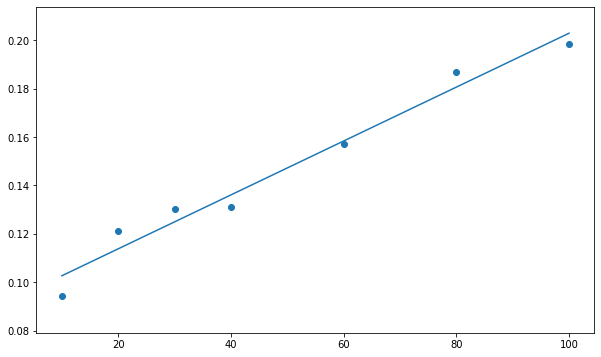

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.scatter(xdata, ydata, label = 'Experimental data')
plt.plot(xdata, slope * xdata + intercept)

## Scatter plots with confidence intervals

To create a scatter plot with a confidence interval, you can use the *seaborn* library. Please note that seaborn has dependencies on other libraries (numpy, scipy, pandas, and matplotlib), so these must be imported before you can use seaborn. 

The following plot is based on resources at [Statology](https://www.statology.org/scatterplot-with-regression-line-python/). I prefer this plot to the simple linear regression above because it make the reliable regions of the calibration curve more obvious by displaying the 95% confidence interval. It also emphasizes the valid range for calculations based on the plot - that we can't use this curve to analyze absorbance values below 0.10 or above 0.20.

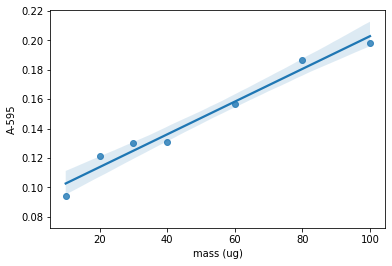

In [19]:
import seaborn as sns

sns.regplot(xdata, ydata)

Now let's try this same plot with more scattered data to see the clearly 

In [20]:
protein_file2 = os.path.join('data', 'protein_assay2.csv')
results = pd.read_csv(protein_file2)
results
xdata = results['mass (ug)']
ydata = results['A-595']
print(xdata,ydata)

0     10
1     20
2     30
3     40
4     60
5     80
6    100
Name: mass (ug), dtype: int64 0    0.091425
1    0.126328
2    0.133031
3    0.145134
4    0.145140
5    0.198546
6    0.187152
Name: A-595, dtype: float64


In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(xdata, ydata)
print("Slope = ", slope, "/microgram/mL", sep = "")
print("Intercept = ", intercept)
print("R-squared = ", r_value**2)
print("P value = ", p_value)
print("Standard error = ", std_err)

Slope = 0.0010289343612334802/microgram/mL
Intercept =  0.09670261674008811
R-squared =  0.8597652528643677
P value =  0.0026370189219552267
Standard error =  0.0001858405755403407


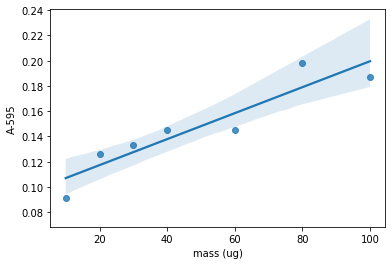

In [22]:
import seaborn as sns

sns.regplot(xdata, ydata)

### Labeling your graph
Now we're going to add some additional information to the graph using tools from matplotlib.pyplot.

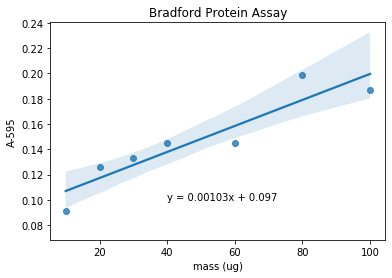

In [23]:
import seaborn as sns

fig, ax = plt.subplots()   # using functions from matplotlib.pyplot
ax.set(title='Bradford Protein Assay')
ax.annotate('y = 0.00103x + 0.097', xy=(40, 0.1))
sns.regplot(xdata, ydata)